<a href="https://colab.research.google.com/github/ofchwan/Deep_Learning/blob/main/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 창시자에게 배우는 딥러닝
## 2. 신경망의 수학적 구성요소

### 2.1 신경망과의 첫만남

In [26]:
# mnist 데이터셋 불러오기
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

In [13]:
# 신경망 구성하기
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [15]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [16]:
# 데이터를 모델에 맞는 size로 바꾸기
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))
# 모든 값을 0 ~ 1 사이로 스케일 조정
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [17]:
# 모델 훈련하기
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 6s 3ms/step - loss: 0.2594 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1059 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0702 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0505 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0381 - accuracy: 0.9887


In [19]:
# 예측해보기
test_digits = test_images[:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 17ms/step


array([3.8617096e-09, 1.0626500e-09, 1.0009806e-05, 1.5105825e-05,
       3.0640865e-11, 3.0025234e-08, 1.4419926e-12, 9.9997365e-01,
       6.8643067e-07, 4.8430553e-07], dtype=float32)

In [21]:
predictions[0].argmax()

7

In [22]:
predictions[0][7]

0.99997365

In [23]:
test_labels[0]

7

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'test accuracy : {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0630 - accuracy: 0.9810
test accuracy : 0.9810000061988831


### 2.2 신경망을 위한 데이터 표현

* 텐서 : 머신 러닝 시스템의 기본 데이터 구조
  * 텐서에서의 차원은 축(axis)라고 함

In [27]:
import numpy as np

In [44]:
# 스칼라(rank = 0 텐서)

x = np.array(12)
x

array(12)

In [45]:
x.ndim # tensor의 축을 알 수 있는 메소드

0

In [46]:
# 벡터(rank = 1 텐서)

x = np.array([12, 3, 6, 4, 5]) # 원소의 개수가 5개이기 때문에 5차원 벡터
x

array([12,  3,  6,  4,  5])

In [47]:
x.ndim

1

In [48]:
# 행렬 (rank = 2 텐서)

x = np.array([
    [5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]
])

In [49]:
x.ndim

2

In [50]:
# 행렬을 하나의 새로운 배열로 합치면 rank = 3 텐서

x = np.array([
    [[5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]],
    [[5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]],
    [[5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]]
])

In [51]:
x.ndim

3

In [52]:
# mnist dataset tensor 확인

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.ndim

3

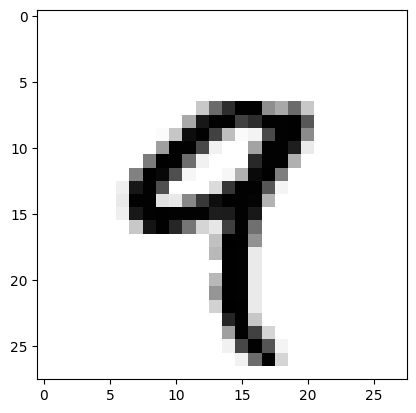

In [53]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [54]:
train_labels[4]

9

### 2.4 신경망의 엔진 : gradient 기반 최적화

* layer의 연산 : \
$$output = relu(dot(W, input) + b)$$
* training loop
  1. 훈련 샘플 x와 이에 상응하는 타깃 y_true의 배치를 추출
  2. x를 사용하여 모델을 실행하고(forward pass), 예측 y_pred 구함
  3. y_pred와 y_true의 차이를 측정하여 배치에 대한 모델의 손실을 계산
  4. 배치에 대한 손실이 조금 감소되도록 모델의 모든 가중치를 업데이트
* 확률적 경사 하강법
  1. 훈련 샘플 배치 x와 이에 상응하는 타깃 y_true를 추출
  2. x로 모델을 실행하고 예측 y_pred를 구함
  3. 이 배치에서 y_pred와 y_true 사이의 오차를 측정하여 모델의 손실을 계산
  4. 모델의 파라미터에 대한 손실 함수의 gradient를 계산
  5. gradient의 반대 방향으로 파라미터를 이동, learning rate만큼 조금 이동

### 2.5 mnist 예제 다시 구현하기

In [59]:
import tensorflow as tf

class NaiveDense:
  def __init__(self, input_size, output_size, activation):
    self.activation = activation

    # weight
    w_shape = (input_size, output_size)
    w_initial_value = tf.random.uniform(w_shape, minval = 0, maxval = 1e-1)
    self.W = tf.Variable(w_initial_value)

    # bias
    b_shape = (output_size,)
    b_initial_value = tf.zeros(b_shape)
    self.b = tf.Variable(b_initial_value)

  def __call__(self, inputs):
    return self.activation(tf.matmul(inputs, self.W) + self.b)

  @property
  def weights(self): # layer의 가중치를 추출하기 위해
    return [self.W, self.b]

In [66]:
class NaiveSequential:
  def __init__(self, layers):
    self.layers = layers

  def __call__(self, inputs):
    x = inputs
    for layer in self.layers:
      x = layer(x)
    return x

  @property
  def weights(self):
    weights = []
    for layer in self.layers:
      weights += layer.weights
    return weights

In [69]:
model = NaiveSequential([
    NaiveDense(input_size = 28 * 28, output_size = 512, activation = tf.nn.relu),
    NaiveDense(input_size = 512, output_size = 10, activation = tf.nn.softmax)
])

assert len(model.weights) == 4

In [74]:
import math

class BatchGenerator: # mini-batch
  def __init__(self, images, labels, batch_size = 128):
    self.index = 0
    self.images = images
    self.labels = labels
    self.batch_size = batch_size
    self.num_batches = math.ceil(len(images) / batch_size)
    """
    math.ceil() : 실수를 올림하여 정수로 반환
    """

  def next(self):
    images = self.images[self.index : self.index + self.batch_size]
    labels = self.labels[self.index : self.index + self.batch_size]
    self.index += self.batch_size
    return images, labels

In [75]:
def one_training_step(model, images_batch, labels_batch):
  with tf.GradientTape() as tape:
    predictions = model(images_batch)
    per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
        labels_batch, predictions
    )
    average_loss = tf.reduce_mean(per_sample_losses)
  gradients = tape.gradient(average_loss, model.weights)
  update_weights(gradients, model.weights)
  return average_loss

learning_rate = 1e-3

def update_weights(gradients, weights):
  for g, w in zip(gradients, weights):
    w.assign_sub(g * learning_rate) # w = w - g * learning_rate

# 실제로는 optimizer를 사용함

from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate = 1e-3)

def update_weights_optimizer(gradients, weights):
  optimizer.apply_gradients(zip(gradients, weights))

In [76]:
# 전체 훈련 loop 구성


def fit(model, images, labels, epochs, batch_size = 128):
  for epoch_counter in range(epochs):
    print(f'epoch : {epoch_counter}')
    batch_generator = BatchGenerator(images, labels)
    for batch_counter in range(batch_generator.num_batches):
      images_batch, labels_batch = batch_generator.next()
      loss = one_training_step(model, images_batch, labels_batch)
      if batch_counter % 100 == 0:
        print(f'{batch_counter}번째 배치 손실 : {loss : .2f}')

In [77]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

fit(model, train_images, train_labels, epochs = 10, batch_size = 128)

epoch : 0
0번째 배치 손실 :  4.46
100번째 배치 손실 :  2.23
200번째 배치 손실 :  2.20
300번째 배치 손실 :  2.05
400번째 배치 손실 :  2.18
epoch : 1
0번째 배치 손실 :  1.88
100번째 배치 손실 :  1.87
200번째 배치 손실 :  1.83
300번째 배치 손실 :  1.67
400번째 배치 손실 :  1.78
epoch : 2
0번째 배치 손실 :  1.56
100번째 배치 손실 :  1.58
200번째 배치 손실 :  1.50
300번째 배치 손실 :  1.40
400번째 배치 손실 :  1.47
epoch : 3
0번째 배치 손실 :  1.31
100번째 배치 손실 :  1.34
200번째 배치 손실 :  1.23
300번째 배치 손실 :  1.18
400번째 배치 손실 :  1.24
epoch : 4
0번째 배치 손실 :  1.12
100번째 배치 손실 :  1.15
200번째 배치 손실 :  1.04
300번째 배치 손실 :  1.02
400번째 배치 손실 :  1.08
epoch : 5
0번째 배치 손실 :  0.97
100번째 배치 손실 :  1.01
200번째 배치 손실 :  0.90
300번째 배치 손실 :  0.91
400번째 배치 손실 :  0.97
epoch : 6
0번째 배치 손실 :  0.87
100번째 배치 손실 :  0.91
200번째 배치 손실 :  0.80
300번째 배치 손실 :  0.82
400번째 배치 손실 :  0.88
epoch : 7
0번째 배치 손실 :  0.79
100번째 배치 손실 :  0.82
200번째 배치 손실 :  0.72
300번째 배치 손실 :  0.75
400번째 배치 손실 :  0.82
epoch : 8
0번째 배치 손실 :  0.72
100번째 배치 손실 :  0.75
200번째 배치 손실 :  0.66
300번째 배치 손실 :  0.70
400번째 배치 손실 :  0.77
epoch : 9
0번째 배치 손실 :  0.67


In [78]:
# 평가하기


predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis = 1)
matches = predicted_labels == test_labels
print(f'정확도 : {matches.mean():.2f}')

정확도 : 0.82
